In [16]:
# Importing necessary libraries
import pandas as pd              # For data manipulation
import numpy as np               # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.tree import DecisionTreeClassifier, plot_tree  # For decision tree model and visualization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluating the model
from sklearn.preprocessing import LabelEncoder  # For encoding categorical data
import matplotlib.pyplot as plt   # For plotting the decision tree


In [17]:
# Load the dataset from the CSV file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
df = pd.read_csv("bank.csv", sep=';')  # Read the dataset, specifying ';' as separator

# Show the first few rows of the dataset to understand its structure
print(df.head())


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [18]:
# Convert the target variable 'y' ('yes' or 'no') to numeric (1 or 0)
le = LabelEncoder()  # Create an instance of LabelEncoder

# Apply LabelEncoder to the 'y' column (target variable)
df['y'] = le.fit_transform(df['y'])  # 'yes' -> 1, 'no' -> 0

# Show the first few rows to verify the transformation
print(df.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y  
0  cellular   19   oct        79         1     -1         0  unknown  0  
1  cellular   11   may       220         1    339         4  failure  0  
2  cellular   16   apr       185         1    330         1  failure  0  
3   unknown    3   jun       199         4     -1         0  unknown  0  
4   unknown    5   may       226         1     -1         0  unknown  0  


In [19]:
# Select columns that are of object (categorical) type
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode all categorical columns (except the target 'y')
for col in categorical_columns:
    if col != 'y':  # Skip encoding the target column
        df[col] = le.fit_transform(df[col])

# Show the first few rows to confirm that all categorical data has been encoded
print(df.head())


   age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1     -1         0         3  0  
1   11      8       220         1    339         4         0  0  
2   16      0       185         1    330         1         0  0  
3    3      6       199         4     -1         0         3  0  
4    5      8       226         1     -1         0         3  0  


In [20]:
# Define X (features) and y (target)
X = df.drop('y', axis=1)  # Features are all columns except 'y' (target)
y = df['y']  # Target is the 'y' column (the outcome we want to predict)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets to verify the split
print(f"Training data shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing data shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training data shape: X_train: (3616, 16), y_train: (3616,)
Testing data shape: X_test: (905, 16), y_test: (905,)


In [21]:
# Create and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)  # Initialize the classifier with a random state for reproducibility
dt_classifier.fit(X_train, y_train)  # Fit the classifier on the training data

# After fitting, we can make predictions or evaluate the model


DecisionTreeClassifier(random_state=42)

In [22]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model's performance

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the predictions
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (precision, recall, F1-score, etc.)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8718

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905


Confusion Matrix:
[[743  64]
 [ 52  46]]


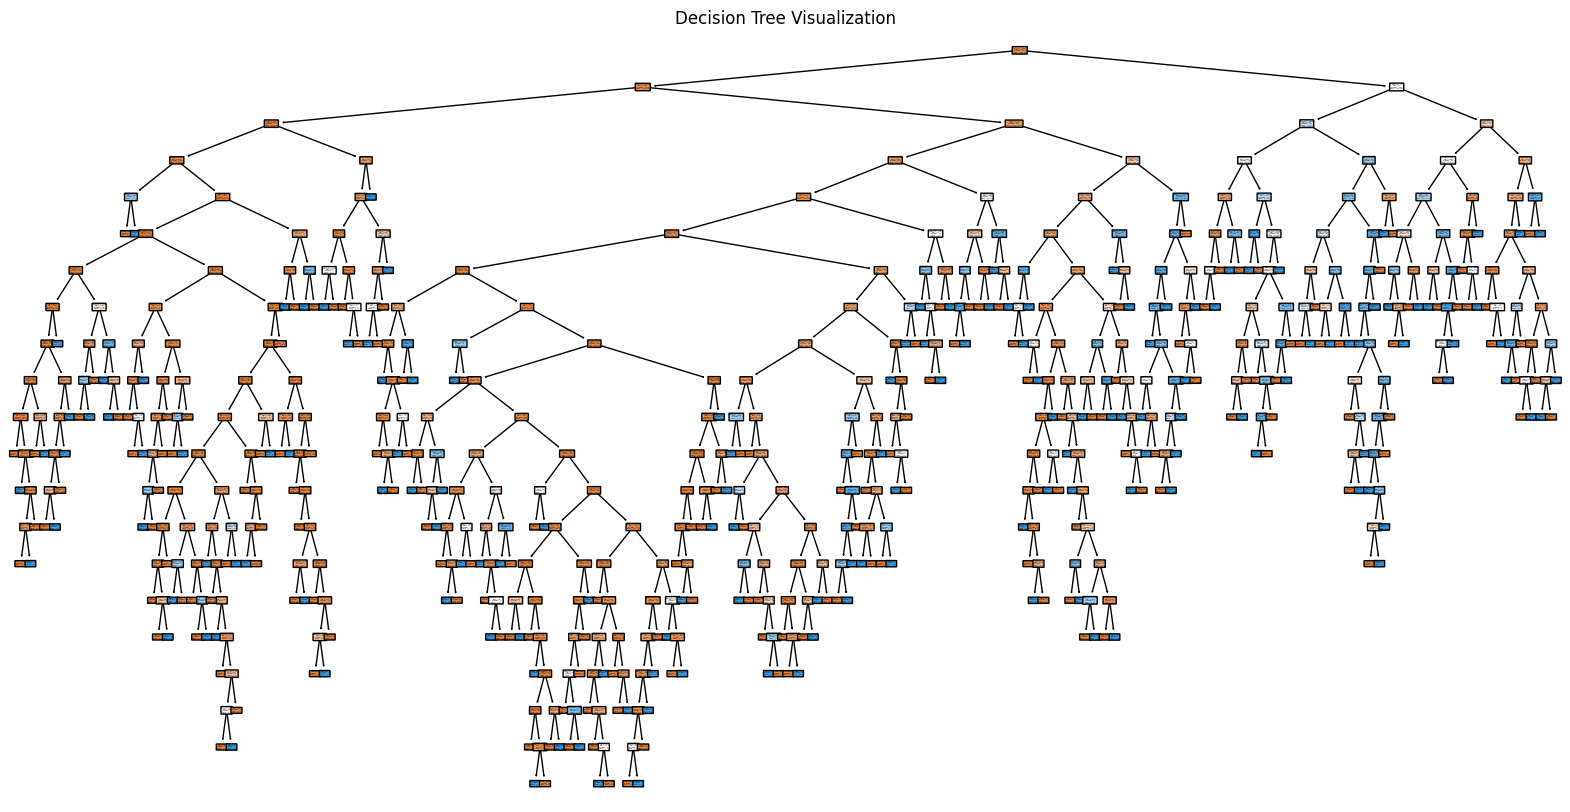

In [23]:
# Plot the Decision Tree for interpretation
plt.figure(figsize=(20,10))  # Set the figure size for better readability
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=le.classes_, rounded=True)

# Add a title
plt.title("Decision Tree Visualization")
plt.show()  # Show the plot
